In [1]:
# импортируем нужные библиотеки
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd

# Задание 1

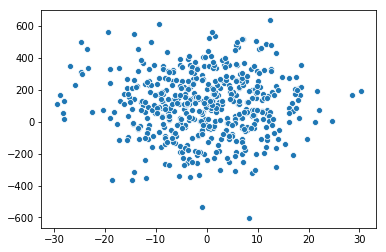

In [2]:
# генерируем x и y, распределенные нормально, строим scatterpot
x = np.random.normal(0, 10, 500)
y = np.random.normal(100, 200, 500)
sns.scatterplot(x, y)

# Задание 2

C:\Programs\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


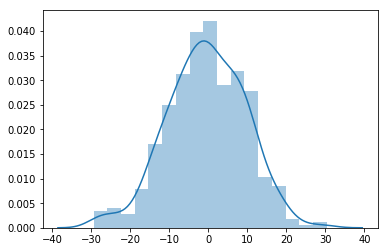

In [3]:
# строим график плотности распределения для x
sns.distplot(x)

# Задание 3

In [4]:
# меняем масштаб при помощи Scale, строим график из которого видим, что значения по осям поменялись
X = np.vstack((x, y)).T
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])
Y = X.dot(Scale)

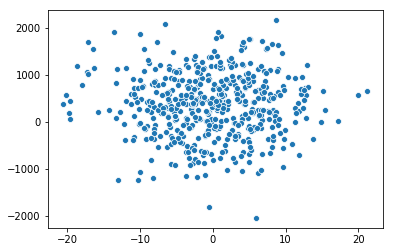

In [5]:
sns.scatterplot(Y[:, 0], Y[:, 1])

# Задание 4

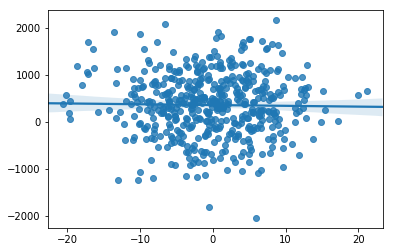

In [6]:
# не совсем понял задание, т.к. график корреляции мы уже построили (scatter plot)
sns.regplot(Y[:, 0], Y[:, 1])

# Задание 6

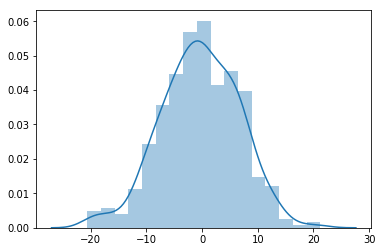

In [7]:
# опять не совсем понял задания, т.к. только после масштабирования у нас плотность распределения не изменится
sns.distplot(Y[:, 0])

# Задание 5

In [8]:
# т.к. данные у нас случайные, то коэффициент корреляции будет приближен к нулю (отсутствие мат. взаимосвязи)
corr, p_value = pearsonr(x, y)
print(corr)

-0.01765237118468283


# Задание 7

In [9]:
uniform_dist = np.random.uniform(1, 11, 99999)

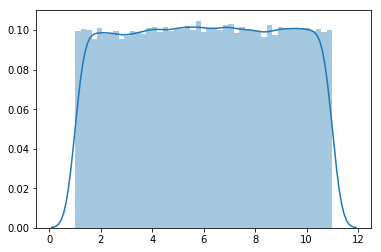

In [10]:
# график плотности вероятности стремится к "квадратной" форме при увеличении выборки
sns.distplot(uniform_dist)

# Задание 8
На графике предположительно 4 выброса, это могут быть ошибки в данных, либо аномальные значения, которые будут сильно искажать модель.

# Задание 9

In [11]:
import io
import requests
url = "http://yustiks.ru/avocado.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
# оставляем только столбцы с числовыми значениями для поиска корреляций, убираем мусорные столбцы
df = df._get_numeric_data().drop("Unnamed: 0", axis=1)
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


Существует сильная прямая взаимосвязь между объемом покупок и количеством пакетом (всех типов). Остальные коэффициенты несущественны.
Наблюдается сильная прямая взаимосвязь между покупками разного типа авокадо (т.е. их преимущественно покупают вместе).